In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import swifter

/Users/viditjain/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
routes_df = pd.read_csv('routes_df_as.csv')

In [3]:
def removeNones(input):
    return [c for c in input if c is not None]

In [4]:
routes_df_unique = routes_df['0'].swifter.apply(lambda val:removeNones(list(set(eval(val)))))

Pandas Apply: 100%|██████████| 84424650/84424650 [07:02<00:00, 199910.55it/s]


In [5]:
routes_df_unique = [[x for x in c if x is not None] for c in routes_df_unique]

In [6]:
routes_df_unique_1 = [c for c in routes_df_unique if len(c) > 1]

In [7]:
G = nx.Graph()

In [8]:
routes_df_unique_series = pd.Series(routes_df_unique_1)

In [9]:
routes_df_unique_series.swifter.apply(lambda link: G.update(nx.complete_graph(link)))

Pandas Apply: 100%|██████████| 2618960/2618960 [00:28<00:00, 92253.10it/s]


0          None
1          None
2          None
3          None
4          None
           ... 
2618955    None
2618956    None
2618957    None
2618958    None
2618959    None
Length: 2618960, dtype: object

In [15]:
nx.adjacency_spectrum(G)

In [10]:
import pickle

# save graph object to file
pickle.dump(G, open('AS_routes.pickle', 'wb'))

In [1]:
import pickle

G = pickle.load(open('AS_routes.pickle', 'rb'))

In [37]:
len(G.edges())

216518

In [6]:
adj_matrix = nx.adjacency_matrix(G)

In [7]:
adj_matrix

<58617x58617 sparse array of type '<class 'numpy.int64'>'
	with 433036 stored elements in Compressed Sparse Row format>

In [8]:
from scipy.sparse.linalg import eigs
from scipy.linalg import eig, eigh

In [9]:
vals, vecs = eigs(adj_matrix.astype(float), k=100)

In [10]:
vals_real = [abs(c.real) for c in vals]

In [11]:
import matplotlib.pyplot as plt

In [23]:
ranks = range(1, len(vals_real)+1)

In [21]:
vals_real_log = [np.log(x) for x in vals_real]

In [24]:
np.corrcoef(np.log(vals_real), np.log(ranks))

array([[ 1.       , -0.9978523],
       [-0.9978523,  1.       ]])

In [25]:
ranks_log = np.log(ranks)

In [31]:
from sklearn.linear_model import LinearRegression

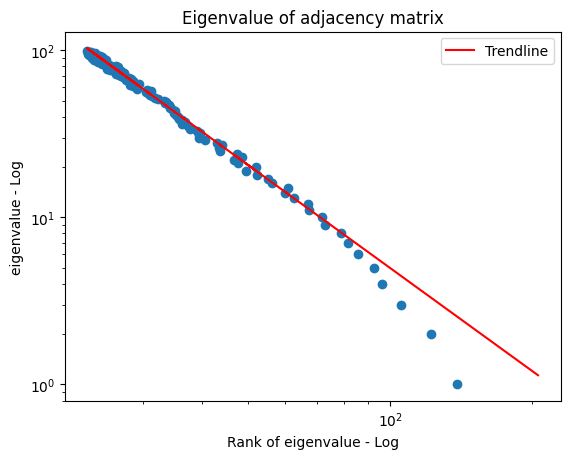

In [34]:


plt.scatter(vals_real, y=range(len(vals_real)))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank of eigenvalue - Log')
plt.ylabel('eigenvalue - Log')
plt.title('Eigenvalue of adjacency matrix')

# Linear regression for trendline
X = np.log(vals_real).reshape(-1, 1)
y = np.log(range(1, len(vals_real)+1))
model = LinearRegression().fit(X, y)
trendline = model.predict(X)

# Plot trendline
plt.plot(vals_real, np.exp(trendline), color='red', label='Trendline')

# Show plot
plt.legend()
plt.show()


In [28]:
vecs

array([[ 2.09184636e-03+0.j,  2.83703828e-03+0.j, -2.26823940e-03+0.j,
        ..., -1.68843034e-05+0.j, -2.03196594e-03+0.j,
        -1.88662308e-03+0.j],
       [ 1.45603048e-01+0.j, -1.56484652e-01+0.j, -8.80831687e-02+0.j,
        ..., -1.06862283e-01+0.j, -1.35589625e-01+0.j,
        -5.09144555e-02+0.j],
       [ 9.79159035e-04+0.j,  1.29141169e-03+0.j, -1.19651846e-03+0.j,
        ..., -2.48163321e-03+0.j,  2.87942597e-04+0.j,
        -1.74956609e-03+0.j],
       ...,
       [ 1.16595633e-05+0.j, -3.27277981e-05+0.j, -2.00333525e-05+0.j,
        ...,  6.63691203e-05+0.j,  3.25715622e-05+0.j,
        -5.55593818e-05+0.j],
       [ 7.56535211e-06+0.j, -2.37739535e-05+0.j, -1.15788475e-05+0.j,
        ...,  1.52200331e-05+0.j,  3.57495516e-05+0.j,
        -9.31879066e-06+0.j],
       [ 4.93924612e-05+0.j, -6.28659874e-05+0.j, -6.70903126e-05+0.j,
        ..., -4.04979347e-04+0.j, -1.03808808e-04+0.j,
        -1.23234112e-04+0.j]])